# A2DI : TP1 - Perceptron

## Génération des points

(Question 1, 2 et 3)

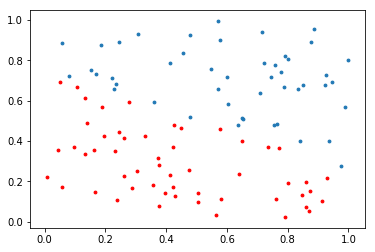

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Permet l'affichage des graphiques

%matplotlib inline

# Variable utiles

nb_features = 2

# Génération d'un tableau de 100 points uniformément réparti

def generate_points():
    points_x = []
    points_y = []
    points_class = []
    for i in range(100):
        x = np.random.random()
        y = np.random.random()
        point_class = 0
        if (-1/2) * x + 0.75 < y:
            point_class = 1
        points_x.append(x)
        points_y.append(y)
        points_class.append(point_class)

    return points_x, points_y, points_class

points_x, points_y, points_class = generate_points()

# Création du graphique de répartition des points

points_x_0 = []
points_y_0 = []
points_x_1 = []
points_y_1 = []
nb_0 = 0
nb_1 = 0

for i in range(len(points_class)):
    if points_class[i] == 0:
        points_x_0.append(points_x[i])
        points_y_0.append(points_y[i])
        nb_0 += 1
    else:
        points_x_1.append(points_x[i])
        points_y_1.append(points_y[i])
        nb_1 += 1

plt.scatter(points_x_0, points_y_0, s=8, c='red')
plt.scatter(points_x_1, points_y_1, s=8)

In [2]:
# Découpage en 80/20 de l'ensemble

def generate_datasets():
    X_app = []
    Y_app = []
    X_test = []
    Y_test = []

    limit_0 = int(nb_0 * (80/100))
    limit_1 = int(nb_1 * (80/100))

    for i in range(nb_0):
        p = [points_x_0[i], points_y_0[i]]
        if i > limit_0-1:
            X_test.append(p)
            Y_test.append(0)
        else:
            X_app.append(p)
            Y_app.append(0)

    for i in range(nb_1):
        p = (points_x_1[i], points_y_1[i])
        if i > limit_1-1:
            X_test.append(p)
            Y_test.append(1)
        else:
            X_app.append(p)
            Y_app.append(1)

    return X_app, Y_app, X_test, Y_test

X_app, Y_app, X_test, Y_test = generate_datasets()

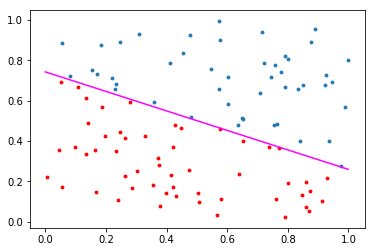

In [3]:
# Fonction ptrain

def evaluate(x, theta):
    # Ajout du 1 à chaque x
    npx = np.insert(np.array(x), nb_features, 1, axis=1)

    # On met theta comme il faut
    theta = theta.reshape((1, nb_features+1))
    
    # Calcul
    v = np.dot(theta, npx.T)

    # On applique la fonction signe
    v = np.sign(v)
    
    return v
    
def ptrain(xapp, yapp):
    theta = np.array([np.random.random() for _ in range(nb_features+1)])
    
    cpt_success = 0
    
    while cpt_success < len(xapp):
        cpt_success = 0
        for i in range(len(xapp)):
            ev = evaluate([xapp[i]], theta)
            c = ev[0][0]

            # Erreur
            if (c == 1 and yapp[i] == 0) or (c == -1 and yapp[i] == 1):
                theta -= c * np.concatenate((np.array(xapp[i]),np.array([1])))
            else:
                cpt_success += 1
    return theta


theta = ptrain(X_app, Y_app)

plt.scatter(points_x_0, points_y_0, s=8, c='red')
plt.scatter(points_x_1, points_y_1, s=8)

arr = np.array([i/1000 for i in range(0, 1000)])
formula = lambda x : -((theta[0] * x + theta[2])/theta[1])
plt.plot(arr, formula(arr), c="magenta")

        